In [65]:
import numpy as np
from matplotlib import pyplot as plt
from rpathlib import *

# RPathLib Test and Demo

## RPathGen [TEST]

In [66]:
PG = RPathGen()
assert PG.method == LOGNORM
assert PG.N == 500
assert PG.T == 1
assert PG.val0 == 100
assert PG.params == {'sig': 0.1, 'mu': 0}
assert PG._time[0] == 0
assert PG._time[-1] == 1
assert len(PG._time) == PG.N+1

In [67]:
s=s2=n=0
for _ in range(1000):
    vec = PG._new_gauss_vec
    s += sum(vec)
    s2 += sum(vec*vec)
    n+= len(vec)
print(f"mean={s/n:0.6g} var={s2/n:0.6f} [expected: 0,1]")
assert s/n < 0.01
assert s2/n < 1.01
assert s2/n > 0.99

mean=-0.000149637 var=0.999645 [expected: 0,1]


In [68]:
PG = RPathGen(N=1, sig=0.2)
assert PG.params == {'sig': 0.2, 'mu': 0}
assert PG.newpath()[0] == 100
s=sl=sl2=n=0
for _ in range(10000):
    val = PG.newpath()[1]
    logval = log(val)
    s += val
    sl += logval
    sl2 += logval*logval
    n+=1
print(f"mean={s/n:0.2f} logvar={sl2/n-(sl/n)**2:0.4f} [expected: 100,{0.2**2:0.2f}]")
assert abs(s/n-100) < 1
assert abs(sl2/n-(sl/n)**2-0.04) < 0.005

mean=99.83 logvar=0.0396 [expected: 100,0.04]


In [69]:
PG = RPathGen(NORM)
assert PG.method == NORM
assert PG.params == {'sig': 1, 'mu': 0}

In [70]:
PG = RPathGen(NORM, sig=5, mu=100, N=1)
assert PG.params == {'sig': 5, 'mu': 100}
s=s2=n=0
for _ in range(10000):
    val = PG.newpath()[1]
    s += val
    s2 += val*val
    n+=1
print(f"mean={s/n:0.2f} var={s2/n-(s/n)**2:0.4f} [expected: 200,25]")
assert abs(s/n-200) < 1
assert abs(s2/n-(s/n)**2-25) < 1

mean=200.00 var=25.1857 [expected: 200,25]


## RPath [TEST]

In [71]:
PG = RPathGen()
paths = PG.generate(10,list)
assert len(paths)==10
assert paths[0]._time is paths[1]._time
path=paths[0]

In [72]:
assert len(path.time()) == len(path.path())
assert len(path.time()) == 501
assert len(path.time(skip=1)) == 251
assert len(path.time(skip=2)) == 168
assert len(path.time(skip=3)) == 126
assert len(path.time(skip=3, offset=1)) == len(path.time(skip=3, offset=2))
assert path.time(skip=20)[0] == 0
assert path.time(skip=20)[-1] == 1
assert path.time(skip=20, offset=5)[0] == 0
assert path.time(skip=20, offset=5)[-1] == 1

## Examples

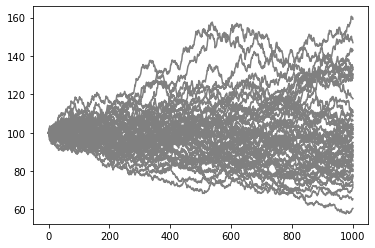

In [73]:
PG = RPathGen(method=RPathGen.LOGNORM, sig=0.2, N=1000)
for _ in range(50):
    plt.plot(PG.newpath(), color="grey")

In [74]:
p = RPath(PG.newpath(), PG.time)

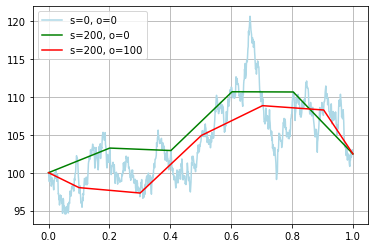

In [75]:
for skp,ofs, col in [(0,0,"lightblue"), (200,0,"green"), (200,100,"red")]:
    plt.plot(p.time(skip=skp, offset=ofs), p.path(skip=skp, offset=ofs), color=col, label=f"s={skp}, o={ofs}")
plt.legend()
plt.grid()

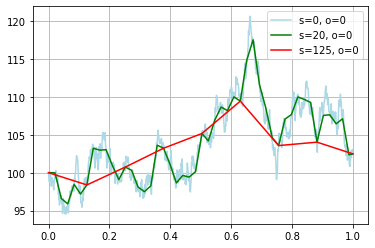

In [76]:
for skp,ofs, col in [(0,0,"lightblue"), (20,0,"green"), (125,0,"red")]:
    plt.plot(p.time(skip=skp, offset=ofs), p.path(skip=skp, offset=ofs), color=col, label=f"s={skp}, o={ofs}")
plt.legend()
plt.grid()

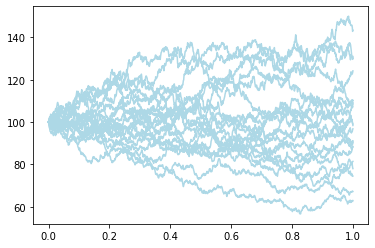

In [83]:
for p in PG.generate(20):
    plt.plot(p.time0, p.path0, color="lightblue")